<a href="https://colab.research.google.com/github/tirthasheshpatel/semester6_practicals/blob/main/dl/Practical-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, Dropout, MaxPool2D, Lambda, Reshape, Conv2DTranspose
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train / 255.
X_test  = X_test  / 255.

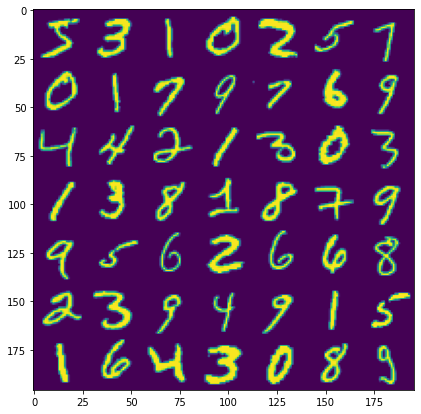

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
X_to_plot = X_train[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax.imshow(X_to_plot)

In [5]:
ann_model_1 = Sequential([
                  Input([28,28]),
                  Flatten(),
                  Dense(100, activation="relu"),
                  Dense(784, activation="sigmoid"),
                  Reshape([28,28])
              ])

ann_model_2 = Sequential([
                  Dense(50, activation="relu"),
                  Dense(100, activation="relu")
              ])

ann_model_3 = Sequential([
                  Dense(10, activation="relu"),
                  Dense(50, activation="relu")
              ])

In [6]:
ann_model_1.compile(loss='mse', optimizer='adam')

In [7]:
history_1 = ann_model_1.fit(X_train, X_train,
                            validation_data=(X_test, X_test),
                            epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - val_loss: 0.0064
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0055 - val_loss: 0.0036
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0026 - val_loss: 0.0025


In [8]:
intermediate_1 = Sequential(ann_model_1.layers[:2]).predict(X_train)
intermediate_1_test = Sequential(ann_model_1.layers[:2]).predict(X_test)

In [9]:
intermediate_1.shape

(60000, 100)

In [10]:
ann_model_2.compile(loss='mse', optimizer='adam')

In [11]:
history_2 = ann_model_2.fit(intermediate_1, intermediate_1,
                            validation_data=(intermediate_1_test, intermediate_1_test),
                            epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 4.4489 - val_loss: 2.1414
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0673 - val_loss: 2.0201
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9842 - val_loss: 1.9903
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9176 - val_loss: 1.5931
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5860 - val_loss: 1.5820


In [12]:
intermediate_2 = Sequential(ann_model_2.layers[:1]).predict(intermediate_1)
intermediate_2_test = Sequential(ann_model_2.layers[:1]).predict(intermediate_1_test)

In [13]:
ann_model_3.compile(loss='mse', optimizer='adam')

In [14]:
history_3 = ann_model_3.fit(intermediate_2, intermediate_2,
                            validation_data=(intermediate_2_test, intermediate_2_test),
                            epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 7.3839 - val_loss: 4.5040
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 4.3396 - val_loss: 4.3422
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 4.2053 - val_loss: 3.6632
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 3.5738 - val_loss: 3.6328
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 3.5488 - val_loss: 3.6293


In [15]:
layers = []
layers += ann_model_1.layers[:2]
layers += ann_model_2.layers[:1]
layers += ann_model_3.layers
layers += ann_model_2.layers[1:]
layers += ann_model_1.layers[2:]

ann_model_final = Sequential(layers)

In [16]:
ann_model_final.compile(loss='mse', optimizer='adam')

In [17]:
history_final = ann_model_final.fit(X_train, X_train,
                                    validation_data=(X_test, X_test),
                                    epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0329 - val_loss: 0.0264
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0259 - val_loss: 0.0237
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - val_loss: 0.0222
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - val_loss: 0.0213
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - val_loss: 0.0204


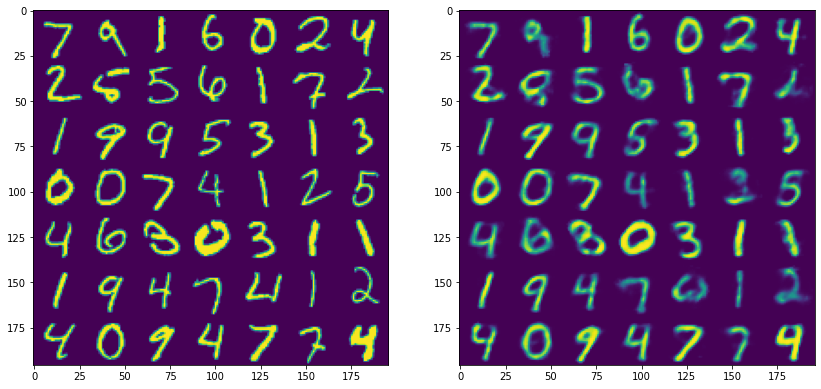

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 28), nrows=1, ncols=2)
X_to_plot = X_test[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax1.imshow(X_to_plot)
X_to_plot = ann_model_final.predict(X_test[:49, ...])
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax2.imshow(X_to_plot)

In [19]:
classification_layers  = ann_model_1.layers[:2]
classification_layers += ann_model_2.layers[:1]
classification_layers += ann_model_3.layers
classification_layers += [Dense(10, activation='softmax')]

In [20]:
classification_model = Sequential(classification_layers)
classification_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history_classification = classification_model.fit(X_train, y_train,
                                                  validation_data=(X_test, y_test),
                                                  epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7088 - accuracy: 0.8032 - val_loss: 0.1463 - val_accuracy: 0.9557
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9616 - val_loss: 0.1153 - val_accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9725 - val_loss: 0.1019 - val_accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9792 - val_loss: 0.0999 - val_accuracy: 0.9711
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0955 - val_accuracy: 0.9731


In [22]:
ann_model = Sequential()
ann_model.add(Input([28,28]))
ann_model.add(Flatten())
ann_model.add(Dense(units=256, activation='relu'))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=128, activation='relu'))
ann_model.add(Dense(units=256, activation='relu'))
ann_model.add(Dense(units=28*28, activation='sigmoid'))
ann_model.add(Reshape([28,28]))

In [23]:
ann_model.compile(loss='mse', optimizer='adam')

In [24]:
history = ann_model.fit(X_train, X_train,
                       validation_data=(X_test, X_test),
                       epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0480 - val_loss: 0.0186
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0176 - val_loss: 0.0141
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0140 - val_loss: 0.0127
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0124 - val_loss: 0.0114
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0113 - val_loss: 0.0108


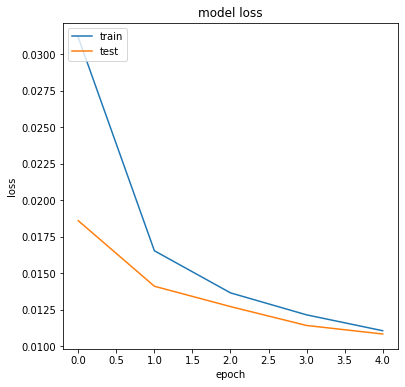

In [25]:
# summarize history for accuracy
fig, ax = plt.subplots(figsize=(6, 6))
# summarize history for loss
ax.plot(history.history['loss']);
ax.plot(history.history['val_loss']);
ax.set_title('model loss');
ax.set_ylabel('loss');
ax.set_xlabel('epoch');
ax.legend(['train', 'test'], loc='upper left');

In [26]:
ann_encoder = Sequential(ann_model.layers[:6])
ann_decoder = Sequential(ann_model.layers[6:])

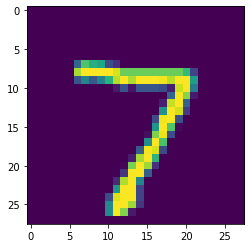

In [27]:
plt.imshow(X_test[0])

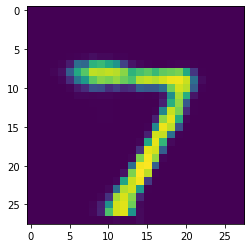

In [28]:
plt.imshow(ann_model.predict(X_test[:1, ...]).reshape(28,28))

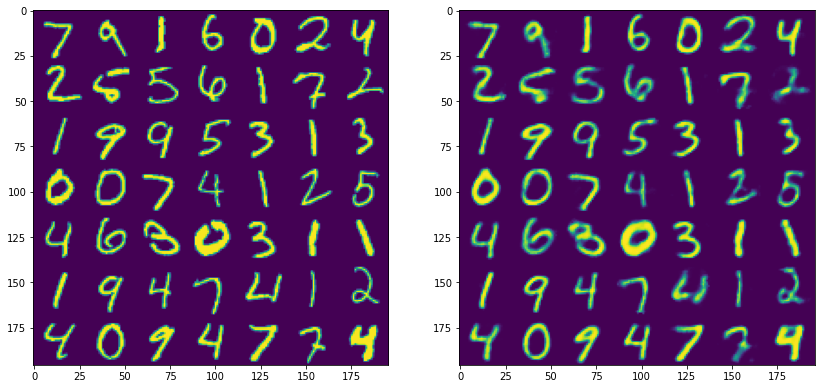

In [29]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 28), nrows=1, ncols=2)
X_to_plot = X_test[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax1.imshow(X_to_plot)
X_to_plot = ann_model.predict(X_test[:49, ...])
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax2.imshow(X_to_plot)

In [30]:
cnn_model = Sequential([
        Reshape([28,28,1]),
        Conv2D(16, 5, 1, activation='relu'),                  # 16 x 24 x 24
        Conv2D(32, 5, 1, activation='relu'),                  # 32 x 20 x 20
        MaxPool2D(2, 2),                                      # 32 x 10 x 10
        Conv2D(64, 5, 1, activation='relu'),                  # 64 x 6 x 6
        Dropout(0.25),
        Conv2D(128, 5, 1, activation='relu'),                 # 128 x 2 x 2
        Dropout(0.15),
        Flatten(),
        Dense(64),                                            # 64 ==> Bottleneck
        Dense(128*2*2, activation='relu'),                    # 128 * 2 * 2
        Reshape([2, 2, 128]),                                 # 128 x 2 x 2
        Conv2DTranspose(64, 5, 1, activation='relu'),         # 64 x 6 x 6
        Conv2DTranspose(32, 5, 1, activation='relu'),         # 32 x 10 x 10
        Conv2DTranspose(32, 11, 1, activation='relu'),        # 32 x 20 x 20
        Conv2DTranspose(16, 5, 1, activation='relu'),         # 16 x 24 x 24
        Conv2DTranspose(1, 5, 1, activation='sigmoid'),       # 1 x 28 x 28
        Reshape([28,28])
])

In [31]:
cnn_model.compile(loss='mse', optimizer='adam')

In [32]:
history = cnn_model.fit(X_train, X_train,
                        validation_data=(X_test, X_test),
                        epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 41s 6ms/step - loss: 0.0486 - val_loss: 0.0117
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0128 - val_loss: 0.0080
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0102 - val_loss: 0.0073
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0084 - val_loss: 0.0062


In [33]:
encoder = Sequential(cnn_model.layers[:10])
decoder = Sequential(cnn_model.layers[10:])

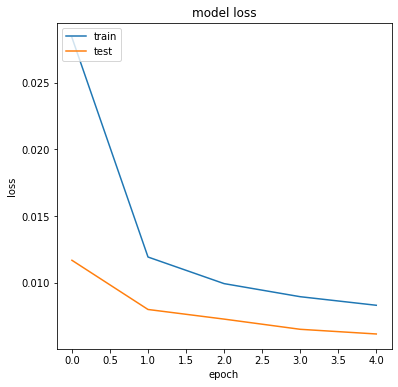

In [34]:
# summarize history for accuracy
fig, ax = plt.subplots(figsize=(6, 6))
# summarize history for loss
ax.plot(history.history['loss']);
ax.plot(history.history['val_loss']);
ax.set_title('model loss');
ax.set_ylabel('loss');
ax.set_xlabel('epoch');
ax.legend(['train', 'test'], loc='upper left');

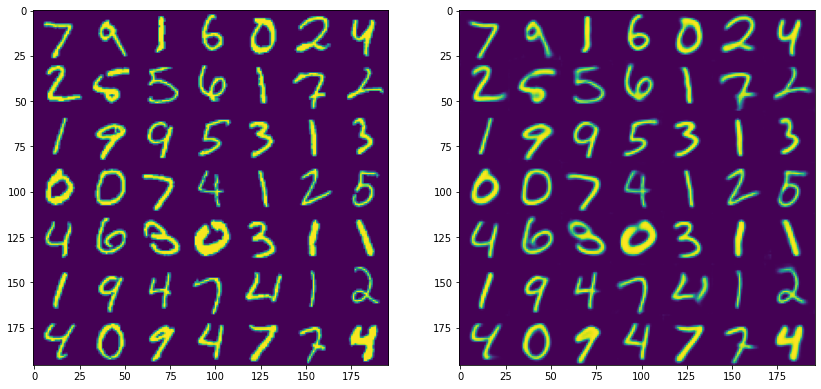

In [35]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 28), nrows=1, ncols=2)
X_to_plot = X_test[:49, ...]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax1.imshow(X_to_plot)
X_to_plot = cnn_model.predict(X_test[:49, ...])
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax2.imshow(X_to_plot)